In [1]:
import io
import glob
import numpy as np
import pandas as pd

import dateutil.tz as tz


import matplotlib.pyplot as plt
import matplotlib as mpl  
import seaborn as sns#; sns.set()
from datetime import datetime, timedelta
from matplotlib.colors import LogNorm

In [2]:
df_od = pd.read_csv('/Users/svisaga/OneDrive - UW-Madison/hsrl_cirrus_pbl_files/02_cirrus_stat_figures/2019_cirrus_v2025.csv')
df_od = df_od[df_od['Flag'] == 'no rain' ]
df_od = df_od.reset_index()

In [3]:
#the next line should be removed. still figuring out how many anomalous values we have.. <4000
#df_od.loc[df_od['cld_bot'] < 8600, 'low_cld'] = 'Y'
#replace with next tline
df_od.loc[(df_od['low_cld'] == 'N') & (df_od['cld_bot']<=4000), 'low_cld'] = 'Y'

#the next 3 lines remove the weird Cirrus Detection when there is a Low Cloud detected!
df_od.loc[df_od['low_cld'] == 'Y', 'od_mean'] = np.nan
df_od.loc[df_od['low_cld'] == 'Y', 'cld_top'] = np.nan
df_od.loc[df_od['low_cld'] == 'Y', 'cld_bot'] = np.nan

df_od = df_od[(df_od['low_cld']== 'Y') | (df_od['low_cld']== 'N')]
df_od['cld_top'] = df_od['cld_top']/1000
df_od['cld_bot'] = df_od['cld_bot']/1000
df_od['cld_tck'] = df_od['cld_top'] - df_od['cld_bot']

df_od.loc[df_od['cld_bot'] >= 0 , 'cirrus'] = 'with cirrus'
df_od.loc[df_od['cld_bot'].isnull() , 'cirrus'] = 'no cirrus'

df_od.loc[df_od['cirrus'] == 'with cirrus' , 'legend'] = 'with cirrus'
df_od.loc[(df_od['cirrus'] == 'no cirrus') & (df_od['low_cld'] == 'N') , 'legend'] = 'clear period'
df_od.loc[(df_od['cirrus'] == 'no cirrus') & (df_od['low_cld'] == 'Y') , 'legend'] = 'low cloud(LC)'

In [4]:
df_od = df_od[['od_mean',  'cld_top', 'cld_bot', 'cld_tck','cld_num', 'u_day', 'cirrus','low_cld',  'Datetime_LT', 'year_LT','month_LT',
       'day_LT', 'hour_LT', 'apparent_zenith', 'legend',
       'season','season_year', 'Period']]

/var/folders/n8/_5lr4ytd691827bdc5_mtzyc0000gq/T/ipykernel_38562/1739132006.py:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.pointplot(x="season_year", y='od_mean', data=df_od_v2.groupby("season_year", as_index=False).mean(),
/Users/svisaga/anaconda3/envs/cmp/lib/python3.11/site-packages/seaborn/categorical.py:1680: UserWarning: You passed a edgecolor/edgecolors ([(1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0), (1.0, 0.0, 0.0)]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y,


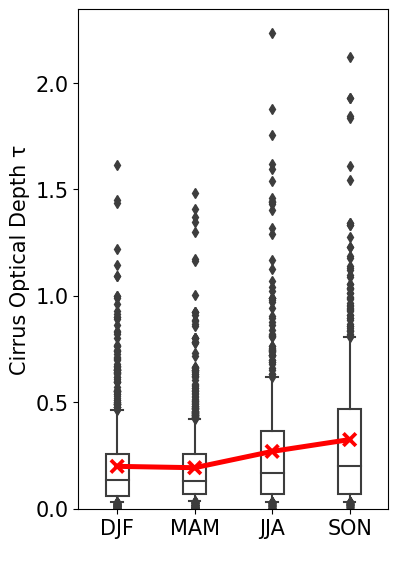

In [5]:
#df_od_v2= df_od[(df_od['od_mean']>= 0) & (df_od['cld_tck']>= 0) & (df_od['year_LT'] == yyyy)]
df_od_v2= df_od[(df_od['od_mean']>= 0) & (df_od['cld_tck']>= 0)]
#df_od_v2 = df_od
order=["JF_19", "MAM_19", "JJA_19", "SON_19"]

df_od_v2.loc[(df_od_v2['month_LT'] >= 7) & (df_od_v2['year_LT'] == 2020) , 'od_mean'] = np.nan
df_od_v2.loc[(df_od_v2['month_LT'] >= 7) & (df_od_v2['year_LT'] == 2020) , 'cld_tck'] = np.nan
df_od_v2.loc[(df_od_v2['month_LT'] >= 7) & (df_od_v2['year_LT'] == 2020) , 'cld_bot'] = np.nan
df_od_v2.loc[(df_od_v2['month_LT'] >= 7) & (df_od_v2['year_LT'] == 2020) , 'cld_top'] = np.nan
    
#make complete plots
a4_dims = (16,24)
fig = plt.figure(figsize=a4_dims)
gs = fig.add_gridspec(3, 3,wspace=0.5,hspace=0.35)
ax = fig.add_subplot(gs[0, 0])
#plt.rcParams["font.weight"] = "bold"
#plt.rcParams["axes.labelweight"] = "bold"
# Define flierprops with reduced alpha
bplot = sns.boxplot(x="season_year", y="od_mean", data=df_od_v2, width=0.3,  boxprops=dict(facecolor='white'),   
                    whis=[10, 90],  showfliers=True, order=order)
with plt.rc_context({'lines.linewidth': 1}):
    sns.pointplot(x="season_year", y='od_mean', data=df_od_v2.groupby("season_year", as_index=False).mean(),
                  ax=ax, markers='x',scale=2, color='red', order=order)
#ax.axhspan(0.0, 0.03, facecolor='blue', alpha=0.2)
#ax.axhspan(0.03, 0.3, facecolor='orange', alpha=0.2)
#ax.axhspan(0.3, 3., facecolor='green', alpha=0.2)

#ax.text(1.01, 0.5, 'opaque\ncirrus', fontsize=15, rotation='vertical', color='green', transform=ax.transAxes)
#ax.text(1.01, 0.05, 'thin\ncirrus', fontsize=15, rotation='vertical', color='orange', transform=ax.transAxes)
plt.ylabel('Cirrus Optical Depth ' + chr(964), fontsize=15)
plt.xlabel(' ', fontsize=15)
# Set custom x-axis tick labels
plt.xticks(ticks=[0, 1, 2, 3], labels=['DJF', 'MAM', 'JJA', 'SON'])

ax.tick_params(axis='y', which='major', labelsize=15)
ax.tick_params(axis='x', which='major', labelsize=15) 
ax.set_ylim(0,)

output_filename = f'Figure4a_cirrusplbpaper.png'
plt.savefig(output_filename, dpi= 300, bbox_inches="tight")


